In [126]:
from skimage import measure
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline

In [127]:
def get_CCA_from_image(image, threshold = 115, show_image=False):
    img = cv2.imread(image,0)
    h,w = img.shape[:2]

    # plt.show()
    if show_image:
        fig,ax = plt.subplots(1)
    # ax.imshow(img,cmap='gray')

    L = measure.label(img)
    # print "Number of components:", np.max(L)
    # print L

    ret, thresh = cv2.threshold(img,threshold,255,cv2.THRESH_BINARY)
    
    output = cv2.connectedComponentsWithStats(thresh, 8, cv2.CV_32S)

    # Get the results
    # The first cell is the number of labels
    num_labels = output[0]
    # The second cell is the label matrix
    labels = output[1]
    # The third cell is the stat matrix
    stats = output[2]
    # The fourth cell is the centroid matrix
    centroids = output[3]

#     print num_labels
#     print labels, len(labels)
#     print stats
#     print centroids

    # cv2.imshow('image',img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    # put a red dot, size 40, at 2 locations:
    # plt.scatter(x=[centroids[0][0], centroids[1][0]], y=[centroids[0][1], centroids[1][1]], c='r', s=40)
    # ax2 = plt.add_subplot(111, aspect='equal')
    max_area_index=-1
    for i in range(len(stats)):
        if stats[i][0]==0 and stats[i][1]==0:
            continue
        if show_image:
            ax.add_patch(
                patches.Rectangle(
                    (stats[i][0], stats[i][1]),
                    stats[i][2],
                    stats[i][3],
                    fill=False,      # remove background
                    color='red'
                )
            )
        if max_area_index==-1:
            max_area_index=i
        elif stats[i][4] > stats[max_area_index][4]:
            max_area_index=i
            
    # fig2.savefig('rect2.png', dpi=90, bbox_inches='tight')
    if show_image:
        ax.imshow(thresh, cmap='gray')
        plt.show()
    #crop
    chosen_box = thresh[stats[max_area_index][1]:stats[max_area_index][1]+stats[max_area_index][3],stats[max_area_index][0]:stats[max_area_index][0]+stats[max_area_index][2]]
    return stats[max_area_index], chosen_box


In [128]:
def get_ratio_of_image(img):
    #ratio of white to black
    a=cv2.countNonZero(img)
    h,w = img.shape[:2]
#     print type(float(a))
#     print (float(h)*float(w))
    return float(float(a)/(float(h)*float(w)))

In [146]:
def get_best_threshold(img_filename, start=50, max_steps = 50, alpha=1):
    min_ratio = float("inf")
    index = -1
    final_chosen_box = None
    final_stats = []
    thresholds = np.arange(start,start+max_steps,alpha)
    for i in thresholds:
        stats, chosen_box = get_CCA_from_image(img_filename, i, show_image=False)
        ratio = get_ratio_of_image(chosen_box)
        if ratio < min_ratio:
            min_ratio = ratio
            index = i
            final_chosen_box = chosen_box
            final_stats = stats
    return index, final_chosen_box, final_stats

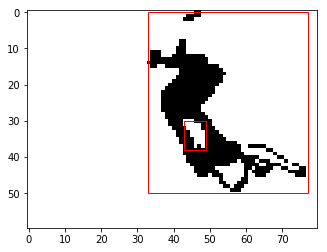

(array([ 33,   0,  44,  50, 511], dtype=int32),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ..., 
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8))

In [130]:
# index, chosen_box, stats = get_best_threshold('dataset-2/rgb67.jpg')
get_CCA_from_image('dataset-2/rgb67.jpg', 100, show_image=True)
# plt.imshow(chosen_box, cmap="gray")
# plt.show()

In [131]:
def get_chosen_box_and_stats(img_filename, threshold):
    stats, chosen_box = get_CCA_from_image(img_filename, threshold, show_image=False)
    return chosen_box, stats

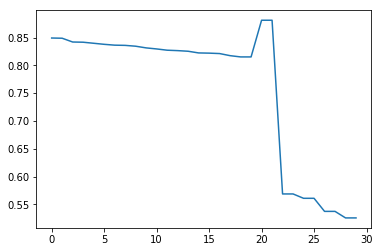

In [132]:
ratios = []
for i in np.arange(80,110,1):
    stats, chosen_box = get_CCA_from_image('dataset-1/rgb40.jpg', i, show_image=False)
    ratios.append(get_ratio_of_image(chosen_box))
plt.plot(ratios)

In [163]:
# test_images = [('dataset-2/rgb66.jpg', 91),'dataset-2/rgb67.jpg',('dataset-2/rgb69.jpg', 80),
#               ('dataset-4/rgb8.jpg', 40), ('dataset-4/rgb9.jpg', 40), ('dataset-4/rgb10.jpg', 60),
#               ('dataset-4/rgb26.jpg', 60),
#               ('dataset-5/rgb72.jpg', 72),('dataset-5/rgb73.jpg', 73),('dataset-5/rgb74.jpg', 74)]
# # overriding
import os
#test_images = []
for root, dirnames, filenames in os.walk('dataset-2'):
    for filename in filenames:
        if filename.endswith('jpg'):
            test_images.append(root+'/'+filename)
print test_images

['dataset-1/rgb49.jpg', 'dataset-1/rgb48.jpg', 'dataset-1/rgb38.jpg', 'dataset-1/rgb39.jpg', 'dataset-1/rgb29.jpg', 'dataset-1/rgb28.jpg', 'dataset-1/rgb26.jpg', 'dataset-1/rgb32.jpg', 'dataset-1/rgb33.jpg', 'dataset-1/rgb27.jpg', 'dataset-1/rgb31.jpg', 'dataset-1/rgb25.jpg', 'dataset-1/rgb24.jpg', 'dataset-1/rgb30.jpg', 'dataset-1/rgb34.jpg', 'dataset-1/rgb35.jpg', 'dataset-1/rgb23.jpg', 'dataset-1/rgb37.jpg', 'dataset-1/rgb36.jpg', 'dataset-1/rgb22.jpg', 'dataset-1/rgb45.jpg', 'dataset-1/rgb50.jpg', 'dataset-1/rgb44.jpg', 'dataset-1/rgb46.jpg', 'dataset-1/rgb47.jpg', 'dataset-1/rgb43.jpg', 'dataset-1/rgb42.jpg', 'dataset-1/rgb40.jpg', 'dataset-1/rgb41.jpg', 'dataset-2/rgb58.jpg', 'dataset-2/rgb64.jpg', 'dataset-2/rgb70.jpg', 'dataset-2/rgb71.jpg', 'dataset-2/rgb65.jpg', 'dataset-2/rgb59.jpg', 'dataset-2/rgb73.jpg', 'dataset-2/rgb67.jpg', 'dataset-2/rgb66.jpg', 'dataset-2/rgb72.jpg', 'dataset-2/rgb76.jpg', 'dataset-2/rgb62.jpg', 'dataset-2/rgb89.jpg', 'dataset-2/rgb88.jpg', 'dataset-2

In [133]:
def get_original_image_cropped(image, stats):
    return image[stats[1]:stats[1]+stats[3],stats[0]:stats[0]+stats[2]]

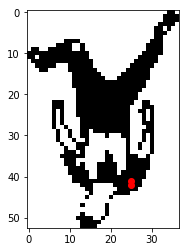

In [165]:
image, contours, hierarchy = cv2.findContours(chosen_box, cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_SIMPLE)
x=[]
y=[]
# print contours
for i in contours[0]:
    x.append(i[0][0])
    y.append(i[0][1])
    plt.imshow(image,cmap='gray')
plt.plot(x, y, 'ro')
plt.show()

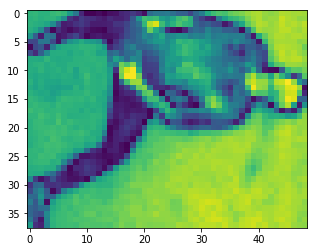

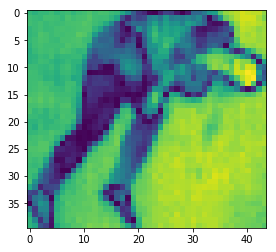

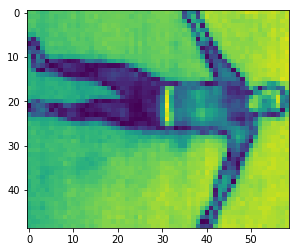

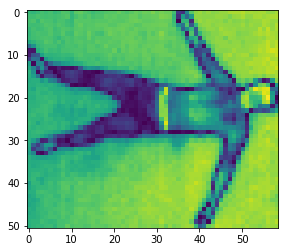

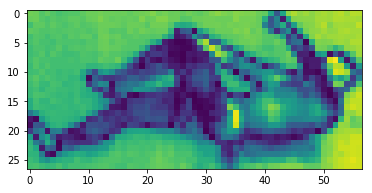

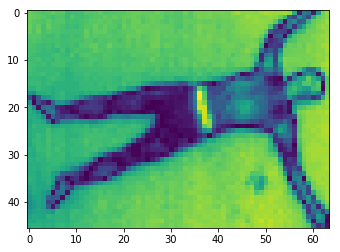

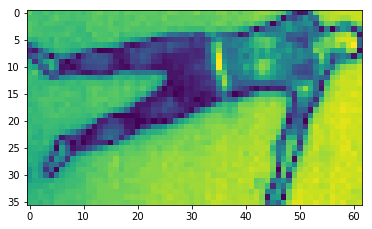

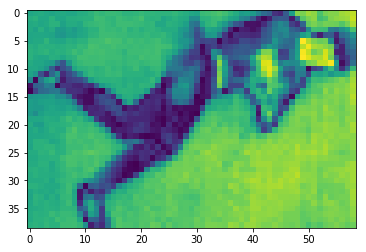

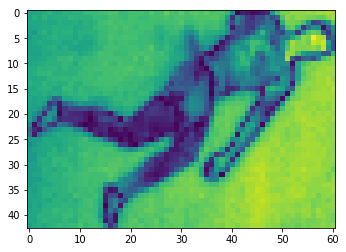

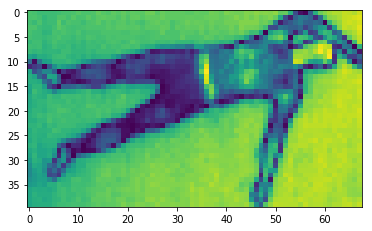

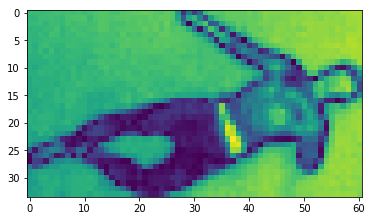

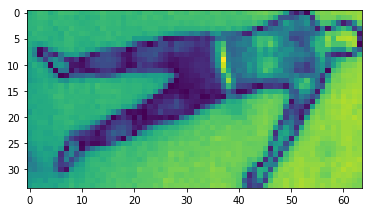

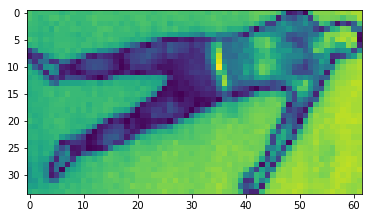

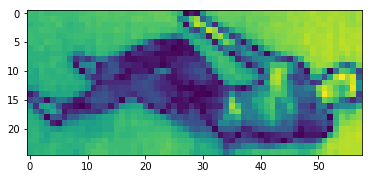

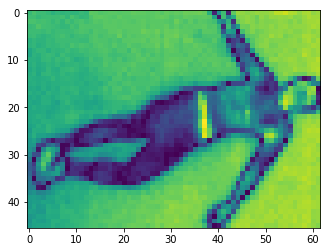

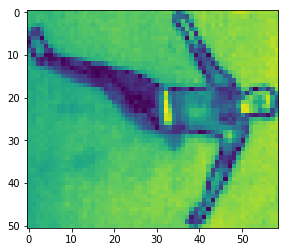

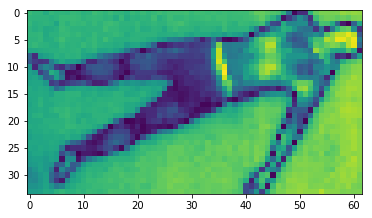

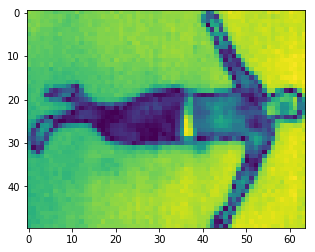

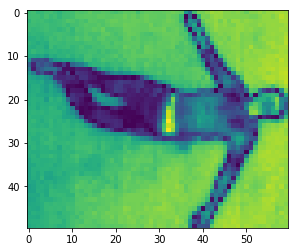

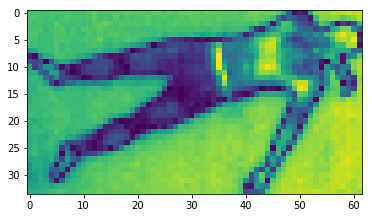

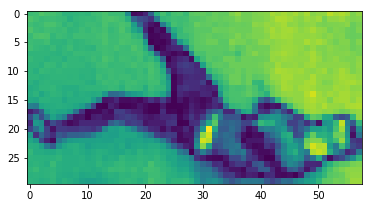

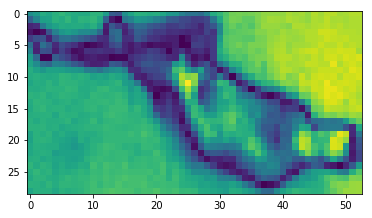

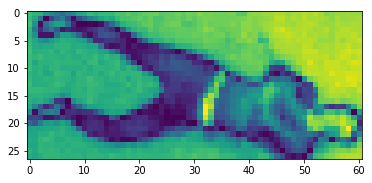

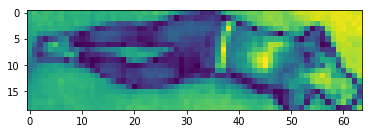

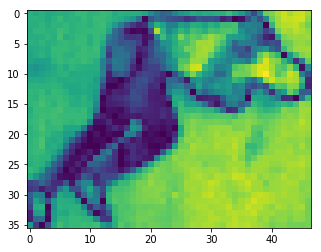

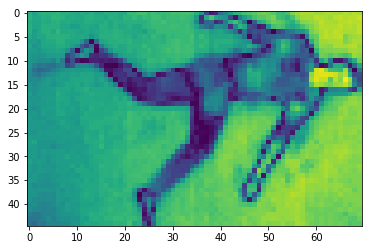

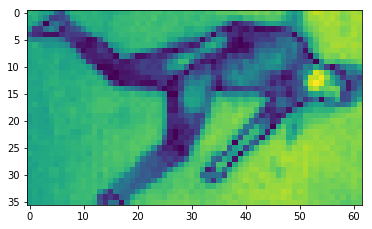

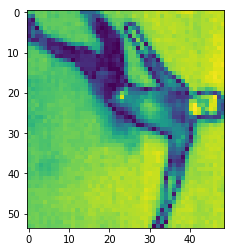

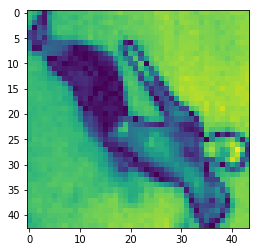

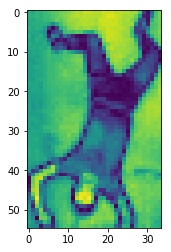

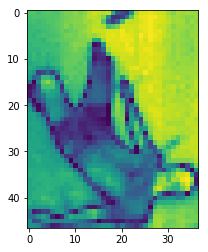

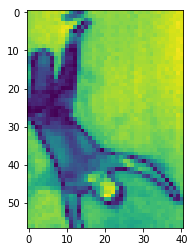

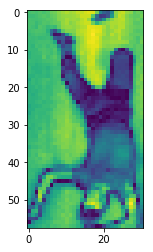

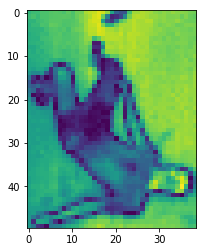

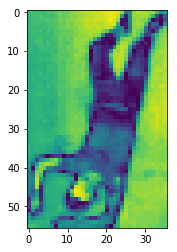

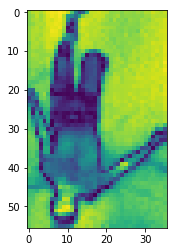

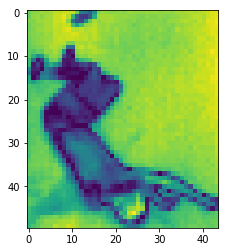

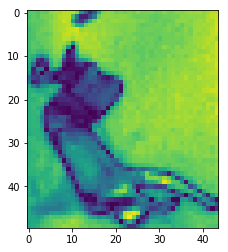

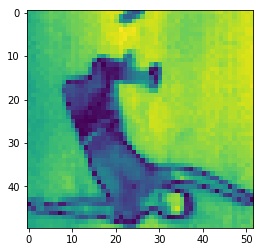

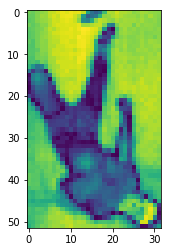

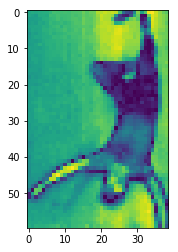

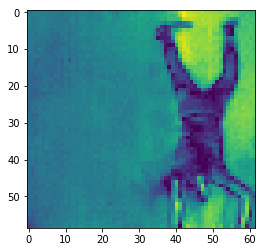

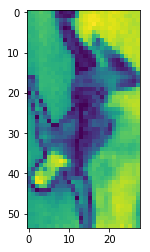

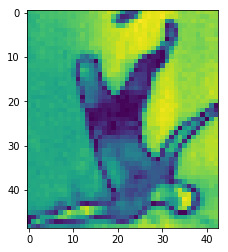

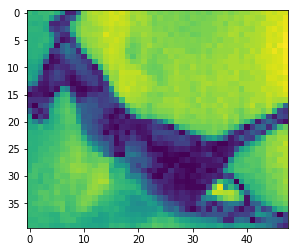

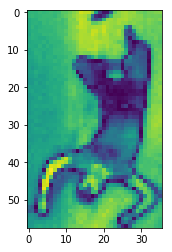

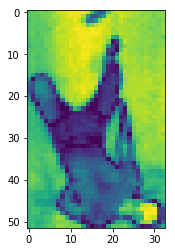

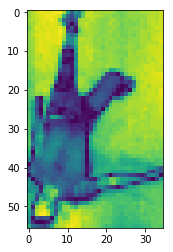

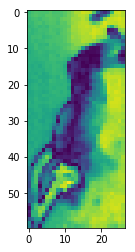

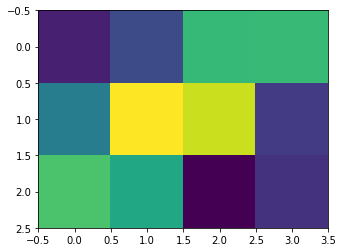

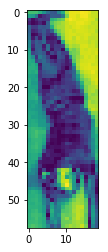

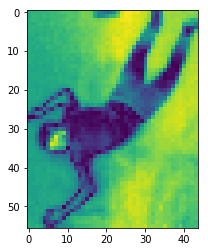

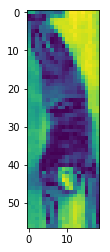

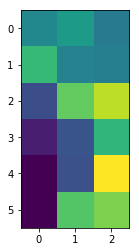

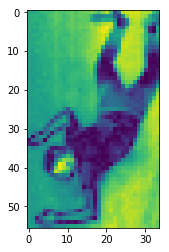

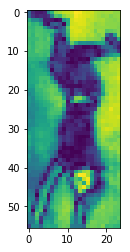

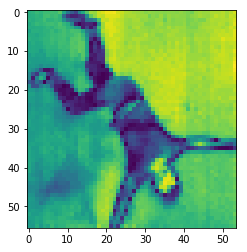

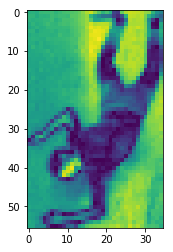

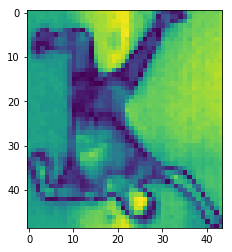

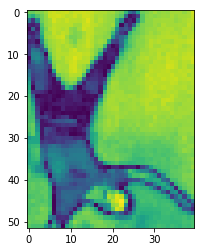

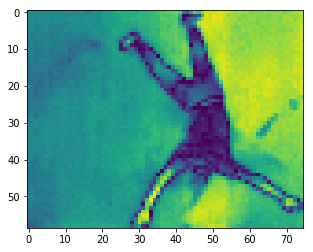

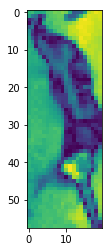

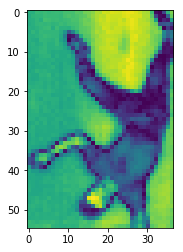

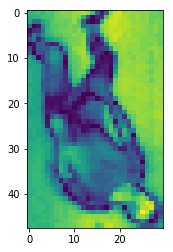

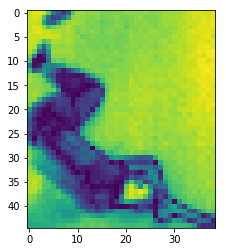

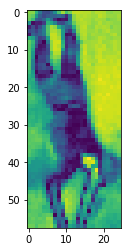

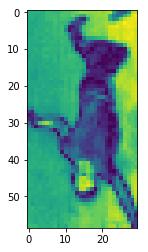

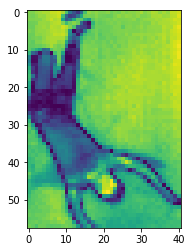

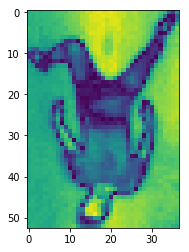

0.00154176562617 8.19780810508e-07 5.84154978167e-11 6.29104683352e-11 2.14984480723e-20 9.05102815745e-14 -2.87527463379e-21


In [167]:
boxes = []
moments = []
use_original_images = True

results = []

for i in test_images:
    if type(i) == tuple:
        filename = i[0]
        chosen_box, stats  = get_chosen_box_and_stats(i[0],i[1])
    else:
        filename = i
        try:
            threshold, chosen_box, stats = get_best_threshold(i)
        except:
            continue
    if use_original_images:
        chosen_box_thermal = get_original_image_cropped(cv2.imread(filename,0), stats)
        boxes.append(chosen_box_thermal)
         
        plt.imshow(chosen_box_thermal)
        plt.show()
        
        temp_moments = cv2.moments(chosen_box_thermal)
        #results.append(cv2.HuMoments(temp_moments))
        
        zz = []
        for _z in cv2.HuMoments(temp_moments):
            zz.append(_z[0])
        results.append(zz)
    else:
        boxes.append(chosen_box)
        plt.imshow(chosen_box)
        plt.show()

# for j in boxes:
#     moments.append(cv2.moments(j))
# for l in moments:
#     print cv2.HuMoments(l)

# 7 of Hu's tings
hu_1 = []
hu_2 = []
hu_3 = []
hu_4 = []
hu_5 = []
hu_6 = []
hu_7 = []

for a_result in results:
    hu_1.append(a_result[0])
    hu_2.append(a_result[1])
    hu_3.append(a_result[2])
    hu_4.append(a_result[3])
    hu_5.append(a_result[4])
    hu_6.append(a_result[5])
    hu_7.append(a_result[6])

print sum(hu_1)/len(hu_1), sum(hu_2)/len(hu_2), sum(hu_3)/len(hu_3), sum(hu_4)/len(hu_4), sum(hu_5)/len(hu_5), sum(hu_6)/len(hu_6), sum(hu_7)/len(hu_7)

In [74]:
import numpy
# proccesing all of them now

# load data
sitting_data = numpy.load('dataset/sitting.npy')
standing_data = numpy.load('dataset/standing.npy')
lying_data = numpy.load('dataset/lying.npy')
# print sitting_data, standing_data, lying_data